In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Create a sequential model

model = keras.Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64))
model.add(layers.LSTM(128))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Design a simple RNN with PyTorch

In [ ]:
# import library
import torch
import torch.nn as nn
import torch.optim as optim


In [ ]:
# create a synthetic dataset

X,y = [],[]
for i in range(1000):
    x = np.linspace(i * np.pi * 2, (i+1) * np.pi * 2, 51)
    sine_wave = np.sin(x)

    X.append(sine_wave[:-1])
    y.append(sine_wave[1:])

print(X)
print(y)


Streaming output truncated to the last 5000 lines.
        4.81753674e-01,  3.68124553e-01,  2.48689887e-01,  1.25333234e-01,
        1.89101559e-13, -1.25333234e-01, -2.48689887e-01, -3.68124553e-01,
       -4.81753674e-01, -5.87785252e-01, -6.84547106e-01, -7.70513243e-01,
       -8.44327926e-01, -9.04827052e-01, -9.51056516e-01, -9.82287251e-01,
       -9.98026728e-01, -9.98026728e-01, -9.82287251e-01, -9.51056516e-01,
       -9.04827052e-01, -8.44327926e-01, -7.70513243e-01, -6.84547106e-01,
       -5.87785252e-01, -4.81753674e-01, -3.68124553e-01, -2.48689887e-01,
       -1.25333234e-01, -3.13569003e-13]), array([ 1.25333234e-01,  2.48689887e-01,  3.68124553e-01,  4.81753674e-01,
        5.87785252e-01,  6.84547106e-01,  7.70513243e-01,  8.44327926e-01,
        9.04827052e-01,  9.51056516e-01,  9.82287251e-01,  9.98026728e-01,
        9.98026728e-01,  9.82287251e-01,  9.51056516e-01,  9.04827052e-01,
        8.44327926e-01,  7.70513243e-01,  6.84547106e-01,  5.87785252e-01,
      

In [ ]:
# Step 1 : Convert this list into tensors - Pytorch
X = torch.tensor(X).float()
y = torch.tensor(y).float()

print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([1000, 50])
torch.Size([1000, 50])


<ipython-input-37-2ad32eda58c7>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X).float()
<ipython-input-37-2ad32eda58c7>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y).float()


In [ ]:
# Define the RNN model using PyTorch
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # initialize hidden state with zeros
        h0 = torch.zeros(1, x.size(0), self.rnn.hidden_size)

        # pass through RNN layer
        out, _ = self.rnn(x, h0)

        # pass through fully connected layer
        out = self.fc(out)
        return out




In [ ]:
# make a object
input_size = 1
hidden_size = 20
output_size = 1

model = SimpleRNN(input_size, hidden_size, output_size)


In [ ]:
# train the model with MSE and optimizer as Adam

num_epochs = 1000
learning_rate = 0.001

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# reshape the data for RNN
X_train = X.unsqueeze(2)  # shape - (1000,50,1)
y_train = y.unsqueeze(2)

print(X_train.shape)
print(y_train.shape)

torch.Size([1000, 50, 1])
torch.Size([1000, 50, 1])


In [ ]:
# training loop
hsitory = []
for epoch in range(num_epochs):
    # forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        hsitory.append(loss.item())


Epoch [10/1000], Loss: 0.4686
Epoch [20/1000], Loss: 0.3732
Epoch [30/1000], Loss: 0.2463
Epoch [40/1000], Loss: 0.1398
Epoch [50/1000], Loss: 0.1050
Epoch [60/1000], Loss: 0.0738
Epoch [70/1000], Loss: 0.0566
Epoch [80/1000], Loss: 0.0426
Epoch [90/1000], Loss: 0.0319
Epoch [100/1000], Loss: 0.0232
Epoch [110/1000], Loss: 0.0161
Epoch [120/1000], Loss: 0.0107
Epoch [130/1000], Loss: 0.0069
Epoch [140/1000], Loss: 0.0046
Epoch [150/1000], Loss: 0.0034
Epoch [160/1000], Loss: 0.0027
Epoch [170/1000], Loss: 0.0022
Epoch [180/1000], Loss: 0.0019
Epoch [190/1000], Loss: 0.0016
Epoch [200/1000], Loss: 0.0014
Epoch [210/1000], Loss: 0.0013
Epoch [220/1000], Loss: 0.0012
Epoch [230/1000], Loss: 0.0011
Epoch [240/1000], Loss: 0.0010
Epoch [250/1000], Loss: 0.0009
Epoch [260/1000], Loss: 0.0009
Epoch [270/1000], Loss: 0.0008
Epoch [280/1000], Loss: 0.0008
Epoch [290/1000], Loss: 0.0007
Epoch [300/1000], Loss: 0.0007
Epoch [310/1000], Loss: 0.0006
Epoch [320/1000], Loss: 0.0006
Epoch [330/1000],

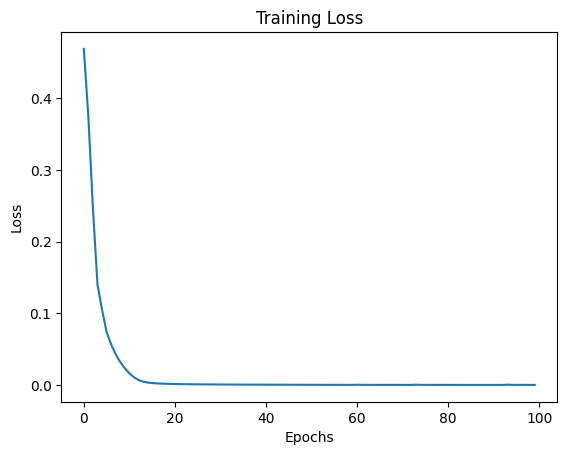

In [ ]:
# plot the result
import matplotlib.pyplot as plt

plt.plot(hsitory)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()



In [ ]:
# predictions
model.eval()

SimpleRNN(
  (rnn): RNN(1, 20, batch_first=True)
  (fc): Linear(in_features=20, out_features=1, bias=True)
)

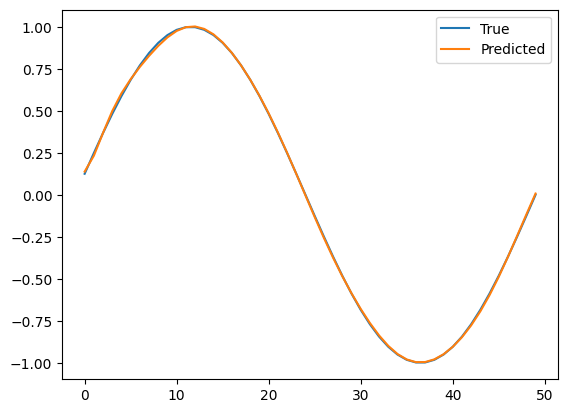

In [ ]:
with torch.no_grad():
    predictions = model(X_train)
# plot the results
plt.plot(y_train.numpy()[0], label='True')
plt.plot(predictions.numpy()[0], label='Predicted')
plt.legend()
plt.show()